In [1]:
import sys
import os

SOURCE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
sys.path.insert(0, SOURCE_DIR)

In [2]:
import malaya_speech
import numpy as np

In [3]:
y_16k, sr_16k = malaya_speech.load('../speech/example-speaker/husein-zolkepli.wav', sr = 16000)
y_16k, sr_16k

(array([ 3.05175781e-05, -7.43723904e-06, -1.56431000e-05, ...,
        -4.53920562e-05, -3.05175781e-05,  0.00000000e+00]),
 16000)

In [4]:
y_22k, sr_22k = malaya_speech.load('../speech/example-speaker/husein-zolkepli.wav', sr = 22050)
y_22k, sr_22k

(array([ 3.05175781e-05, -3.05170865e-05,  9.15497847e-05, ...,
        -3.05185613e-05, -3.05175781e-05,  0.00000000e+00]),
 22050)

In [5]:
import IPython.display as ipd

In [6]:
ipd.Audio(y_16k, rate = sr_16k)

In [7]:
ipd.Audio(y_22k, rate = sr_22k)

In [8]:
scaled_mel = malaya_speech.featurization.scale_mel(y_16k, sr = sr_16k)
mel = malaya_speech.featurization.scale_mel(y_16k, sr = sr_16k, scale = False)
unscaled_mel = malaya_speech.featurization.unscale_mel(scaled_mel)

np.abs(mel - unscaled_mel).mean()

2.742504086764218e-17

In [9]:
audio = malaya_speech.griffin_lim.from_mel(mel, sr = sr_16k)
ipd.Audio(audio, rate = sr_16k)

In [10]:
unscaled_audio = malaya_speech.griffin_lim.from_mel(unscaled_mel, sr = sr_16k)
ipd.Audio(unscaled_audio, rate = sr_16k)

In [11]:
np.abs(audio - unscaled_audio).mean()

0.031642675

In [12]:
scaled_mel = malaya_speech.featurization.scale_mel(y_22k, sr = sr_22k)
mel = malaya_speech.featurization.scale_mel(y_22k, sr = sr_22k, scale = False)
unscaled_mel = malaya_speech.featurization.unscale_mel(scaled_mel)

np.abs(mel - unscaled_mel).mean()

4.093026172672792e-11

In [13]:
audio = malaya_speech.griffin_lim.from_mel(mel, sr = sr_22k)
ipd.Audio(audio, rate = sr_22k)

In [14]:
unscaled_audio = malaya_speech.griffin_lim.from_mel(unscaled_mel, sr = sr_22k)
ipd.Audio(unscaled_audio, rate = sr_22k)

In [15]:
np.abs(audio - unscaled_audio).mean()

0.032980572

In [16]:
import matplotlib.pyplot as plt

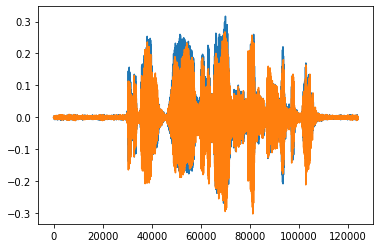

In [18]:
plt.plot(y_22k)
plt.plot(audio)